# **SVM**

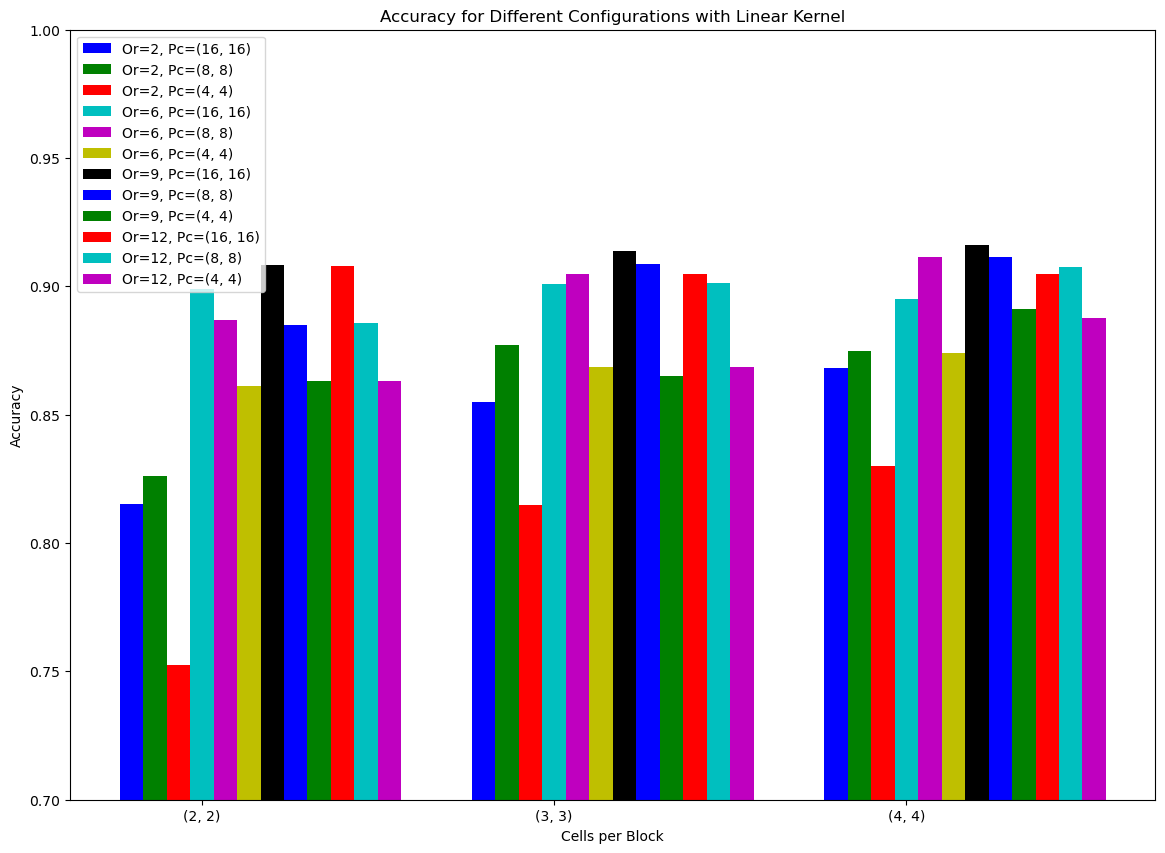

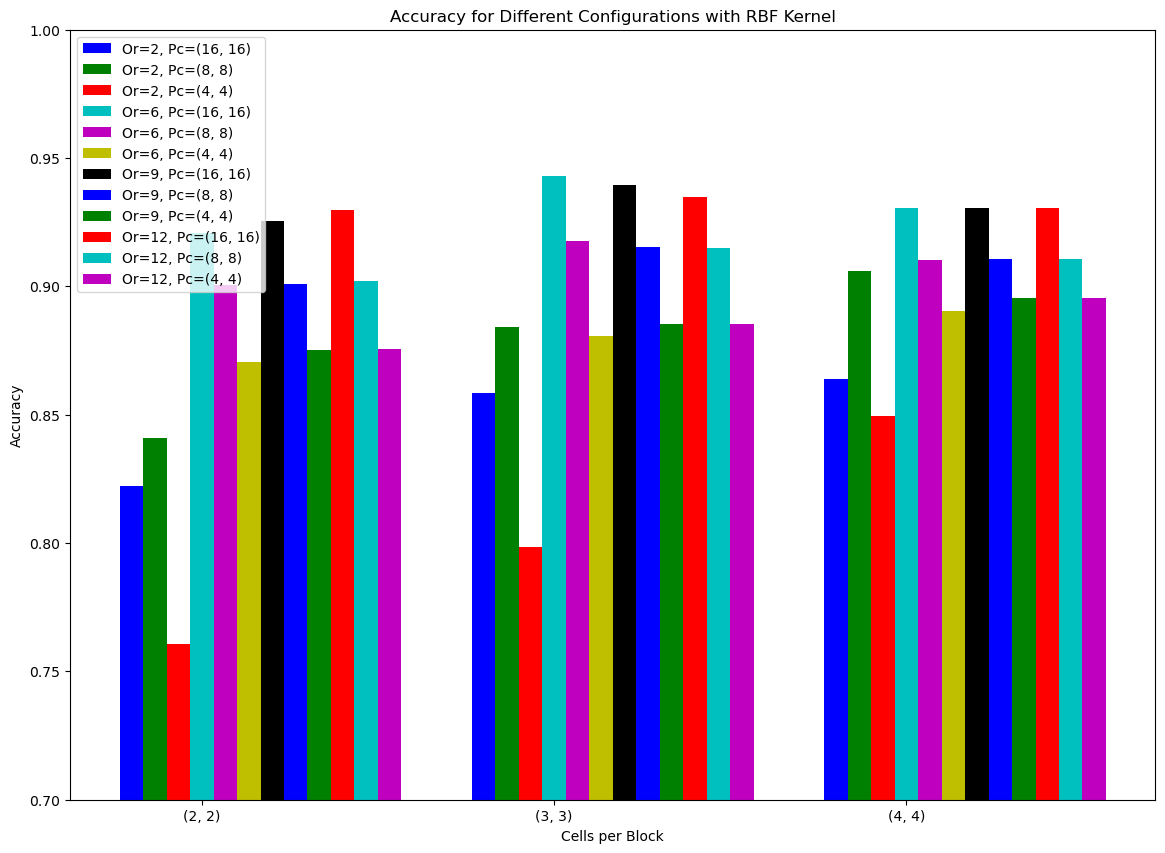

In [15]:
import matplotlib.pyplot as plt
import numpy as np

data = {
    'Linear': {
        2: {
            (16, 16): {(2, 2): 0.8152433481561555, (3, 3): 0.8548755619978872, (4, 4): 0.868239441810186},
            (8, 8): {(2, 2): 0.8261516350146181, (3, 3): 0.877165073827482, (4, 4): 0.8746910547134117},
            (4, 4): {(2, 2): 0.7523536348672089, (3, 3): 0.8147507554725696, (4, 4): 0.8301132594649043}
        },
        6: {
            (16, 16): {(2, 2): 0.8989558509200796, (3, 3): 0.9009434194039752, (4, 4): 0.8949954548804756},
            (8, 8): {(2, 2): 0.8870820332653613, (3, 3): 0.9049062722649437, (4, 4): 0.9113345453652066},
            (4, 4): {(2, 2): 0.8613148907942904, (3, 3): 0.8687344913151364, (4, 4): 0.8741947767977789}
        },
        9: {
            (16, 16): {(2, 2): 0.9083617915141391, (3, 3): 0.9138171633540526, (4, 4): 0.9162948677001695},
            (8, 8): {(2, 2): 0.8850981500135126, (3, 3): 0.9088752671793234, (4, 4): 0.9113357737758887},
            (4, 4): {(2, 2): 0.8632963172247745, (3, 3): 0.8652703731911652, (4, 4): 0.8910240031447314}
        },
        12: {
            (16, 16): {(2, 2): 0.9078716556519175, (3, 3): 0.9049013586222145, (4, 4): 0.9048976733901679},
            (8, 8): {(2, 2): 0.8855931995184629, (3, 3): 0.9014384689089256, (4, 4): 0.9073692356828735},
            (4, 4): {(2, 2): 0.8633049160995505, (3, 3): 0.8687492322433237, (4, 4): 0.8875758543596295}
        }
    },
    'RBF': {
        2: {
            (16, 16): {(2, 2): 0.8221838685109205, (3, 3): 0.8583495074073164, (4, 4): 0.8637889099083604},
            (8, 8): {(2, 2): 0.8409969781097215, (3, 3): 0.8840982237181535, (4, 4): 0.9058939144534801},
            (4, 4): {(2, 2): 0.7607694764513673, (3, 3): 0.7984165786305677, (4, 4): 0.8494214185686559}
        },
        6: {
            (16, 16): {(2, 2): 0.920986877029246, (3, 3): 0.9428527338493635, (4, 4): 0.9305643432345326},
            (8, 8): {(2, 2): 0.9006135575225608, (3, 3): 0.9175079935311038, (4, 4): 0.91043253254364564}, 
            (4, 4): {(2, 2): 0.87057432985325243, (3, 3): 0.8807475464763453, (4, 4): 0.8904563654343432}
        },
        9: {
            (16, 16): {(2, 2): 0.925455847314297, (3, 3): 0.9393750848733997, (4, 4): 0.9304364353637656},
            (8, 8): {(2, 2): 0.9011098354381936, (3, 3): 0.9155204128242165, (4, 4): 0.91056436125326464},
            (4, 4): {(2, 2): 0.8753894256893254, (3, 3): 0.88543263654643656, (4, 4): 0.8955432653464564}
        },
        12: {
            (16, 16): {(2, 2): 0.9299235830771699, (3, 3): 0.9348950038887448, (4, 4): 0.930432121534532}, 
            (8, 8): {(2, 2): 0.9021036257916375, (3, 3): 0.9150216658642272, (4, 4): 0.91054353253221513},
            (4, 4): {(2, 2): 0.87556435643543564, (3, 3): 0.8853421425322532, (4, 4): 0.89554325325325323} 
        }
    }
}

def plot_accuracy_bar(data, title):
    fig, ax = plt.subplots(figsize=(14, 10))
    bar_width = 0.2
    index = np.arange(3)

    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    bars = []
    labels = []
    for i, (orientations, values) in enumerate(data.items()):
        for j, (pixels_per_cell, cell_block_data) in enumerate(values.items()):
            accuracies = []
            for cells_per_block in [(2, 2), (3, 3), (4, 4)]:
                accuracies.append(cell_block_data.get(cells_per_block, 0))
            bar = ax.bar(index + (i * bar_width) + (j * bar_width/len(values)), accuracies, bar_width/len(values), label=f'Or={orientations}, Pc={pixels_per_cell}', color=colors[(i * len(values) + j) % len(colors)])
            bars.append(bar)
            labels.append(f'Or={orientations}, Pc={pixels_per_cell}')

    ax.set_xlabel('Cells per Block')
    ax.set_ylabel('Accuracy')
    ax.set_title(title)
    ax.set_xticks(index + bar_width)
    ax.set_xticklabels(['(2, 2)', '(3, 3)', '(4, 4)'])
    ax.set_ylim([0.7, 1.0])
    ax.legend(labels)
    plt.show()

plot_accuracy_bar(data['Linear'], 'Accuracy for Different Configurations with Linear Kernel')

plot_accuracy_bar(data['RBF'], 'Accuracy for Different Configurations with RBF Kernel')


# **kNN**

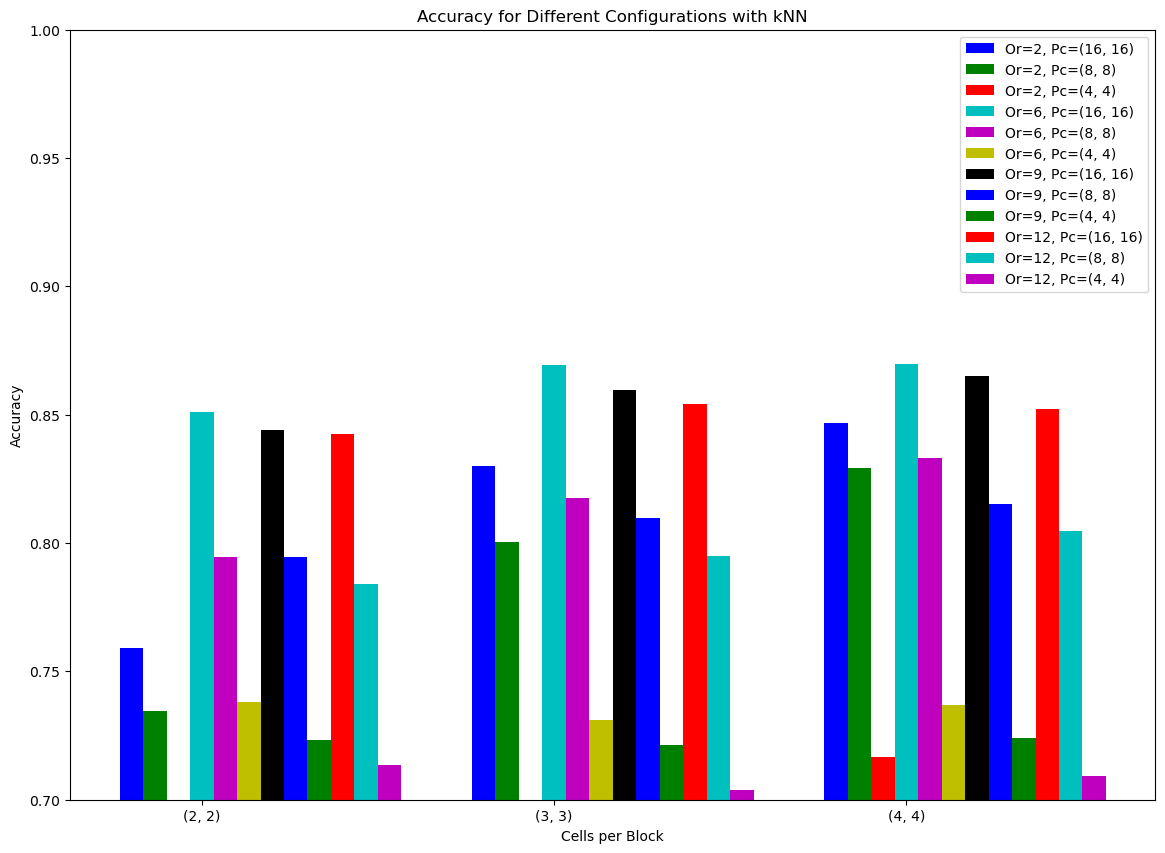

In [13]:
import matplotlib.pyplot as plt
import numpy as np

data = {
    'kNN': {
        2: {
            (16, 16): {(2, 2): 0.7592683585976464, (3, 3): 0.8301083458221754, (4, 4): 0.8469449426332212},
            (8, 8): {(2, 2): 0.7345146549394392, (3, 3): 0.8003783504901358, (4, 4): 0.8291108763481807},
            (4, 4): {(2, 2): 0.659233963098543, (3, 3): 0.6988465223693584, (4, 4): 0.7166879591184925}
        },
        6: {
            (16, 16): {(2, 2): 0.850904110262143, (3, 3): 0.8692332260521338, (4, 4): 0.8697270471464019},
            (8, 8): {(2, 2): 0.794447583716188, (3, 3): 0.8177247377343193, (4, 4): 0.833072500798467},
            (4, 4): {(2, 2): 0.737981229884775, (3, 3): 0.7310468515834214, (4, 4): 0.7369923592855564}
        },
        9: {
            (16, 16): {(2, 2): 0.843968503550107, (3, 3): 0.8598174581726162, (4, 4): 0.8652630027270718},
            (8, 8): {(2, 2): 0.794442670073459, (3, 3): 0.8097978036017001, (4, 4): 0.8152445765668379},
            (4, 4): {(2, 2): 0.7231248310935312, (3, 3): 0.7211372626096357, (4, 4): 0.724095275532516}
        },
        12: {
            (16, 16): {(2, 2): 0.842487040267302, (3, 3): 0.8543694567967963, (4, 4): 0.8523843451342653},
            (8, 8): {(2, 2): 0.7840478588801807, (3, 3): 0.7949414048104563, (4, 4): 0.8048460801415128},
            (4, 4): {(2, 2): 0.713710291624696, (3, 3): 0.7037994742402279, (4, 4): 0.7092437903840012}
        }
    }
}

def plot_accuracy_bar(data, title):
    fig, ax = plt.subplots(figsize=(14, 10))
    bar_width = 0.2
    index = np.arange(3) 

    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    bars = []
    labels = []
    for i, (orientations, values) in enumerate(data.items()):
        for j, (pixels_per_cell, cell_block_data) in enumerate(values.items()):
            accuracies = []
            for cells_per_block in [(2, 2), (3, 3), (4, 4)]:
                accuracies.append(cell_block_data.get(cells_per_block, 0))
            bar = ax.bar(index + (i * bar_width) + (j * bar_width/len(values)), accuracies, bar_width/len(values), label=f'Or={orientations}, Pc={pixels_per_cell}', color=colors[(i * len(values) + j) % len(colors)])
            bars.append(bar)
            labels.append(f'Or={orientations}, Pc={pixels_per_cell}')

    ax.set_xlabel('Cells per Block')
    ax.set_ylabel('Accuracy')
    ax.set_title(title)
    ax.set_xticks(index + bar_width)
    ax.set_xticklabels(['(2, 2)', '(3, 3)', '(4, 4)'])
    ax.set_ylim([0.7, 1.0]) 
    ax.legend(labels)
    plt.show()

plot_accuracy_bar(data['kNN'], 'Accuracy for Different Configurations with kNN')


# **RF**

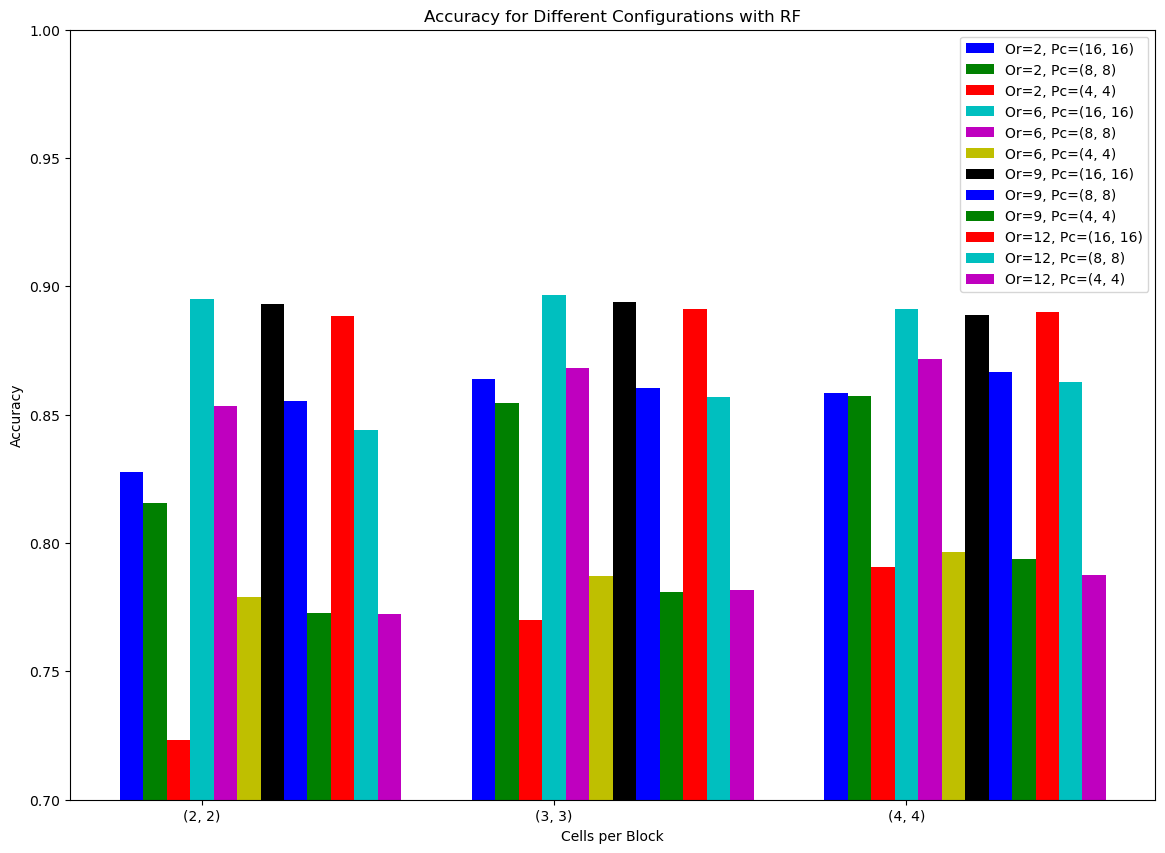

In [14]:
import matplotlib.pyplot as plt
import numpy as np

data = {
    'RF': {
        2: {
            (16, 16): {(2, 2): 0.8276183573692357, (3, 3): 0.863786453086996, (4, 4): 0.8583445937645873},
            (8, 8): {(2, 2): 0.8157322556076949, (3, 3): 0.8543817409036188, (4, 4): 0.8573397538264993},
            (4, 4): {(2, 2): 0.7231162322187553, (3, 3): 0.7701791022774734, (4, 4): 0.7904835024445372}
        },
        6: {
            (16, 16): {(2, 2): 0.8949954548804756, (3, 3): 0.8964830602166917, (4, 4): 0.8910338304301894},
            (8, 8): {(2, 2): 0.8533879566616711, (3, 3): 0.8682455838635972, (4, 4): 0.8717183008623441},
            (4, 4): {(2, 2): 0.7791035058840873, (3, 3): 0.7870242979632951, (4, 4): 0.7964363806107657}
        },
        9: {
            (16, 16): {(2, 2): 0.8930128000393092, (3, 3): 0.8939955285851167, (4, 4): 0.8890474903569763},
            (8, 8): {(2, 2): 0.85537183991352, (3, 3): 0.8603198781416603, (4, 4): 0.8667555217060168},
            (4, 4): {(2, 2): 0.7726617202663194, (3, 3):  0.7810738766184311, (4, 4): 0.7939623614966955}
        },
        12: {
            (16, 16): {(2, 2): 0.8885499840306611, (3, 3): 0.8910301451981427, (4, 4): 0.8900412745989239},
            (8, 8): {(2, 2): 0.843983244478294, (3, 3):  0.8568557600176891, (4, 4): 0.8627975824877774},
            (4, 4): {(2, 2): 0.7721678991720513, (3, 3): 0.7815726113554283, (4, 4): 0.7875205758789278}
        }
    }
}

def plot_accuracy_bar(data, title):
    fig, ax = plt.subplots(figsize=(14, 10))
    bar_width = 0.2
    index = np.arange(3)  

    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    bars = []
    labels = []
    for i, (orientations, values) in enumerate(data.items()):
        for j, (pixels_per_cell, cell_block_data) in enumerate(values.items()):
            accuracies = []
            for cells_per_block in [(2, 2), (3, 3), (4, 4)]:
                accuracies.append(cell_block_data.get(cells_per_block, 0)) 
            bar = ax.bar(index + (i * bar_width) + (j * bar_width/len(values)), accuracies, bar_width/len(values), label=f'Or={orientations}, Pc={pixels_per_cell}', color=colors[(i * len(values) + j) % len(colors)])
            bars.append(bar)
            labels.append(f'Or={orientations}, Pc={pixels_per_cell}')

    ax.set_xlabel('Cells per Block')
    ax.set_ylabel('Accuracy')
    ax.set_title(title)
    ax.set_xticks(index + bar_width)
    ax.set_xticklabels(['(2, 2)', '(3, 3)', '(4, 4)'])
    ax.set_ylim([0.7, 1.0]) 
    ax.legend(labels)
    plt.show()

plot_accuracy_bar(data['RF'], 'Accuracy for Different Configurations with RF')
